<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_3_regression_with_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀"
date: 2020-04-15T20:40:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "다항회귀"
  - "Deep Learning Linear Regression"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다행회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)


## I. 개요 및 소스코드

회귀 모형에서도 딥러닝 네트워크를 만들 수 있습니다. 

In [1]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


## II. 활성화 함수: tanh

딥러닝 `model`은 2개의 `Dense` 레이어로 구성됩니다. 첫번재 Dense 레이어는 활성화함수로 `tanh`를 사용했습니다. `tanh`는 삼각함수 중 탄젠트 함수와 연관이 있으며 실수 입력을 받아 -1과 1 사이의 출력을 반환합니다.[^1]


$$ tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

각각의 활성화함수에 관한 출력 범위는 그림을 참조하시기를 바랍니다. 

첫번째 레이어에는 6개의 뉴런을 할당합니다. 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만 너무 많으면 학습이 제대로 안 되거나 과적합(`overfitting`)이 될 수 있습니다. 두 번째 레이어는 `X` 입력값에 대한 하나의 `Y`값만 출력해야 하기 때문에 뉴런 수가 `1`개입니다. 

## III. 학습에 대한 설명 및 소스코드 구현 

`optimizer`의 손실은 `mse`, 즉 평균 제곱 오차 (`Mean Squared Error`)로서, 잔차의 제곱의 평균이 되기 때문에 손실을 줄이는 쪽으로 학습하면 앞에서 구한 선형 회귀 및 다항 회귀와 동일하게 잔차를 줄이는 방향으로 학습합니다. 

In [2]:
model.fit(X, Y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 255.1181
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 126.4362
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 14.2495
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5839
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5322
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5078
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 9.4812
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4519
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4196
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3841


`X`를 입력하면 `Y`가 정답이 되도록 10회 학습시킵니다. 손실에 거의 변화가 없으면 학습이 거의 다 된것입니다. 

## IV. 모형 예측 및 시각화

모형 예측 후 학습이 잘 된 것인지 확인하려면 그래프를 그려봅니다. 

In [3]:
model.predict(X)

array([[15.816551],
       [15.68471 ],
       [15.11817 ],
       [15.910349],
       [15.238623],
       [15.843683],
       [15.923513],
       [15.865143],
       [15.692286],
       [15.898527],
       [15.628548],
       [15.886652],
       [15.91959 ],
       [15.912346],
       [15.699751],
       [14.232035]], dtype=float32)

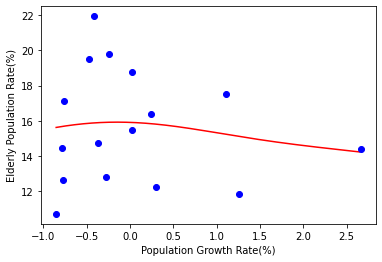

In [4]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

다항 회귀에서 구했던 2차함수와 비슷한 곡선이 나왔는데, 차이점은 딥러닝 네트워크는 좀 더 직선에 가까운 완만한 형태라는 것을 확인하였습니다. 손실도 직선과 2차 함수와 비슷한 크기가 되기 때문에 2차 함수와 비슷한 성능으로 `X` 데이터에 대해서 `Y`를 예측한다고 결론 내릴 수 있습니다. 

## V. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_3_regression_with_deeplearning.ipynb) 

## VI. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.